In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_val = df_train.tail(900)
df_train = df_train[::-900]

C:\Users\USER\AppData\Local\Temp\ipykernel_10316\2271782803.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')
C:\Users\USER\AppData\Local\Temp\ipykernel_10316\2271782803.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('test.csv')


In [3]:
df_train['Structure.YearBuilt'] = df_train['Structure.YearBuilt'].astype('object')
df_train['Location.GIS.Latitude'] = df_train['Location.GIS.Latitude'].astype('object')
df_train['Location.GIS.Longitude'] = df_train['Location.GIS.Longitude'].astype('object')

In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 107436 to 336
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Characteristics.LotFeatures             46 non-null     object 
 1   Characteristics.LotSizeSquareFeet       3 non-null      float64
 2   ImageData.c1c6.summary.bathroom         90 non-null     float64
 3   ImageData.c1c6.summary.exterior         98 non-null     float64
 4   ImageData.c1c6.summary.interior         93 non-null     float64
 5   ImageData.c1c6.summary.kitchen          92 non-null     float64
 6   ImageData.c1c6.summary.property         111 non-null    float64
 7   ImageData.features_reso.results         114 non-null    object 
 8   ImageData.q1q6.summary.bathroom         90 non-null     float64
 9   ImageData.q1q6.summary.exterior         93 non-null     float64
 10  ImageData.q1q6.summary.interior         93 non-null     f

In [5]:
missing_table = pd.DataFrame({
    "Missing Count": df_train.isnull().sum(),
    "Percentage (%)": (df_train.isnull().mean() * 100).round(2)
})

# Mostrar la tabla
print(missing_table)

                                        Missing Count  Percentage (%)
Characteristics.LotFeatures                        74           61.67
Characteristics.LotSizeSquareFeet                 117           97.50
ImageData.c1c6.summary.bathroom                    30           25.00
ImageData.c1c6.summary.exterior                    22           18.33
ImageData.c1c6.summary.interior                    27           22.50
ImageData.c1c6.summary.kitchen                     28           23.33
ImageData.c1c6.summary.property                     9            7.50
ImageData.features_reso.results                     6            5.00
ImageData.q1q6.summary.bathroom                    30           25.00
ImageData.q1q6.summary.exterior                    27           22.50
ImageData.q1q6.summary.interior                    27           22.50
ImageData.q1q6.summary.kitchen                     28           23.33
ImageData.q1q6.summary.property                    10            8.33
ImageData.room_type_

In [6]:
missing_table = pd.DataFrame({
    "Missing Count": df_test.isnull().sum(),
    "Percentage (%)": (df_test.isnull().mean() * 100).round(2)
})

# Mostrar la tabla
print(missing_table)

                                        Missing Count  Percentage (%)
Characteristics.LotFeatures                     13050           59.21
Characteristics.LotSizeSquareFeet               21765           98.76
ImageData.c1c6.summary.bathroom                  2652           12.03
ImageData.c1c6.summary.exterior                  4563           20.70
ImageData.c1c6.summary.interior                  2235           10.14
ImageData.c1c6.summary.kitchen                   2395           10.87
ImageData.c1c6.summary.property                  1017            4.61
ImageData.features_reso.results                   621            2.82
ImageData.q1q6.summary.bathroom                  2654           12.04
ImageData.q1q6.summary.exterior                  5807           26.35
ImageData.q1q6.summary.interior                  2233           10.13
ImageData.q1q6.summary.kitchen                   2395           10.87
ImageData.q1q6.summary.property                  1168            5.30
ImageData.room_type_

In [7]:
missing_percentage = df_train.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()
df_colums_to_drop = missing_percentage[missing_percentage > 50]

df_train_cleaned = df_train.drop(columns=columns_to_drop)
df_test_cleaned = df_test.drop(columns=columns_to_drop)
df_val_cleaned = df_val.drop(columns=columns_to_drop)

In [8]:
df_numeric_columns = df_train_cleaned.select_dtypes(include=['number'])
df_categorical_columns = df_train_cleaned.select_dtypes(include=['object', 'bool'])

In [9]:
print(df_numeric_columns.head(0))
print(df_categorical_columns.head(0))

Empty DataFrame
Columns: [ImageData.c1c6.summary.bathroom, ImageData.c1c6.summary.exterior, ImageData.c1c6.summary.interior, ImageData.c1c6.summary.kitchen, ImageData.c1c6.summary.property, ImageData.q1q6.summary.bathroom, ImageData.q1q6.summary.exterior, ImageData.q1q6.summary.interior, ImageData.q1q6.summary.kitchen, ImageData.q1q6.summary.property, Listing.Price.ClosePrice, Structure.BathroomsFull, Structure.BathroomsHalf, Structure.BedroomsTotal, Structure.GarageSpaces, Structure.LivingArea, Structure.Rooms.RoomsTotal]
Index: []
Empty DataFrame
Columns: [ImageData.features_reso.results, ImageData.room_type_reso.results, ImageData.style.exterior.summary.label, ImageData.style.stories.summary.label, Listing.Dates.CloseDate, Listing.ListingId, Location.Address.CensusBlock, Location.Address.CensusTract, Location.Address.City, Location.Address.CountyOrParish, Location.Address.PostalCode, Location.Address.StateOrProvince, Location.Address.StreetName, Location.Address.StreetNumber, Locati

In [10]:
print(df_train_cleaned['Structure.Cooling'])

107436                NaN
106536    ['central air']
105636    ['central air']
104736    ['central air']
103836    ['central air']
               ...       
3936      ['central air']
3036      ['central air']
2136      ['central air']
1236      ['central air']
336       ['central air']
Name: Structure.Cooling, Length: 120, dtype: object


In [11]:
df_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 107436 to 336
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ImageData.features_reso.results         114 non-null    object
 1   ImageData.room_type_reso.results        119 non-null    object
 2   ImageData.style.exterior.summary.label  96 non-null     object
 3   ImageData.style.stories.summary.label   95 non-null     object
 4   Listing.Dates.CloseDate                 120 non-null    object
 5   Listing.ListingId                       120 non-null    object
 6   Location.Address.CensusBlock            106 non-null    object
 7   Location.Address.CensusTract            106 non-null    object
 8   Location.Address.City                   120 non-null    object
 9   Location.Address.CountyOrParish         118 non-null    object
 10  Location.Address.PostalCode             120 non-null    object
 11  L

In [12]:
print(df_categorical_columns['Structure.Basement'])

107436       ['full']
106536       ['full']
105636       ['none']
104736    ['partial']
103836       ['none']
             ...     
3936              NaN
3036         ['none']
2136         ['full']
1236         ['full']
336               NaN
Name: Structure.Basement, Length: 120, dtype: object


In [13]:
from fancyimpute import IterativeImputer
import pandas as pd

# Selecciona solo las columnas numéricas
numeric_columns = df_train_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Crea el imputador MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Imputar las columnas numéricas
df_train_cleaned[numeric_columns] = mice_imputer.fit_transform(df_train_cleaned[numeric_columns])
df_val_cleaned[numeric_columns] = mice_imputer.transform(df_val_cleaned[numeric_columns])
# Verifica las columnas imputadas
print(df_train_cleaned[numeric_columns].head())


        ImageData.c1c6.summary.bathroom  ImageData.c1c6.summary.exterior  \
107436                         2.484482                         2.100000   
106536                         3.300000                         3.200000   
105636                         3.190409                         3.310291   
104736                         2.200000                         2.525688   
103836                         3.800000                         3.000000   

        ImageData.c1c6.summary.interior  ImageData.c1c6.summary.kitchen  \
107436                         2.458680                        1.439816   
106536                         3.000000                        3.100000   
105636                         3.280434                        3.266390   
104736                         2.200000                        2.000000   
103836                         3.800000                        4.000000   

        ImageData.c1c6.summary.property  ImageData.q1q6.summary.bathroom  \
107436          

In [14]:
# Seleccionar las columnas categóricas
categorical_columns = df_train_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

# Rellenar los valores faltantes con "Unknown"
df_train_cleaned['ImageData.features_reso.results'] = df_train_cleaned['ImageData.features_reso.results'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else x
)
df_train_cleaned['ImageData.room_type_reso.results'] = df_train_cleaned['ImageData.room_type_reso.results'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else x
)
df_train_cleaned['Structure.Cooling'] = df_train_cleaned['Structure.Cooling'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else x
)
df_train_cleaned['Structure.Heating'] = df_train_cleaned['Structure.Heating'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else x
)
#df_train_cleaned[categorical_columns] = df_train_cleaned[categorical_columns].fillna(['Unknown']) Structure.Cooling
df_train_cleaned[categorical_columns] = df_train_cleaned[categorical_columns].fillna('Unknown')
df_val_cleaned[categorical_columns] = df_val_cleaned[categorical_columns].fillna('Unknown')
# Verificar los resultados
print(df_train_cleaned[categorical_columns].head())


                          ImageData.features_reso.results  \
107436  ['ConstructionMaterials.BoardAndBattenSiding',...   
106536  ['Appliances.BuiltInRefrigerator', 'Appliances...   
105636                                          [Unknown]   
104736  ['Appliances.Dishwasher', 'Appliances.Electric...   
103836  ['Appliances.Dishwasher', 'Appliances.Microwav...   

                         ImageData.room_type_reso.results  \
107436                               ['FrontOfStructure']   
106536  ['FrontOfStructure', 'Kitchen', 'DiningArea', ...   
105636                                          [Unknown]   
104736  ['FrontOfStructure', 'Kitchen', 'LivingRoom', ...   
103836  ['FrontOfStructure', 'LivingRoom', 'Kitchen', ...   

       ImageData.style.exterior.summary.label  \
107436                              craftsman   
106536                               garrison   
105636                                Unknown   
104736                                Unknown   
103836               

C:\Users\USER\AppData\Local\Temp\ipykernel_10316\272206197.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_val_cleaned[categorical_columns] = df_val_cleaned[categorical_columns].fillna('Unknown')


In [15]:
import pandas as pd
import ast  # Para convertir cadenas en listas
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import spearmanr
from scipy.stats import f_oneway

# Paso 1: Manejar valores NaN y convertir cadenas en listas reales
# Si hay valores NaN, los reemplazamos con ['Unknown']
df_train_cleaned['ImageData.features_reso.results'] = df_train_cleaned['ImageData.features_reso.results'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else (ast.literal_eval(x) if isinstance(x, str) else x)
)

# Paso 2: Aplicar MultiLabelBinarizer para transformar las listas en variables binarias
mlb = MultiLabelBinarizer()
binary_features = mlb.fit_transform(df_train_cleaned['ImageData.features_reso.results'])
binary_df = pd.DataFrame(binary_features, columns=mlb.classes_, index=df_train_cleaned.index)

# Paso 3: Concatenar las columnas binarias con el DataFrame original
df = pd.concat([df_train_cleaned, binary_df], axis=1)

# Paso 4: Realizar ANOVA para cada variable binarizada
anova_results = {}
for column in binary_df.columns:
    # Dividir la variable continua en grupos según la variable binaria
    group_0 = df[df[column] == 0]['Listing.Price.ClosePrice']
    group_1 = df[df[column] == 1]['Listing.Price.ClosePrice']
    
    # Calcular ANOVA
    if len(group_0) > 1 and len(group_1) > 1:  # Asegurarse de que hay suficientes datos en ambos grupos
        f_stat, p_value = f_oneway(group_0, group_1)
        anova_results[column] = (f_stat, p_value)
    else:
        anova_results[column] = (None, None)  # Insuficientes datos para el ANOVA

# Paso 5: Ordenar los resultados por el estadístico F
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1][0] if x[1][0] is not None else 0, reverse=True)

# Paso 6: Filtrar características importantes según p-valor
threshold_p_value = 0.05
important_features = [feature for feature, (f_stat, p_value) in anova_results.items() if p_value is not None and p_value < threshold_p_value]

# Mostrar resultados
print("Resultados de ANOVA ordenados (por estadístico F):")
for feature, (f_stat, p_value) in sorted_anova:
    if f_stat is not None:
        print(f"{feature}: Estadístico F={f_stat:.3f}, p-valor={p_value:.3f}")

print("\nCaracterísticas importantes (p-valor < 0.05):", important_features)

significant_binary_df = binary_df[important_features]
df_train_cleaned = pd.concat([df_train_cleaned, significant_binary_df], axis=1)

Resultados de ANOVA ordenados (por estadístico F):
Appliances.DoubleOven: Estadístico F=56.323, p-valor=0.000
Appliances.Oven: Estadístico F=49.881, p-valor=0.000
Appliances.Cooktop: Estadístico F=36.962, p-valor=0.000
InteriorOrRoomFeatures.CofferedCeilings: Estadístico F=26.487, p-valor=0.000
Appliances.GasCooktop: Estadístico F=20.057, p-valor=0.000
Heating.Fireplaces: Estadístico F=19.291, p-valor=0.000
Appliances.StainlessSteelAppliances: Estadístico F=17.548, p-valor=0.000
InteriorOrRoomFeatures.KitchenIsland: Estadístico F=14.089, p-valor=0.000
WindowFeatures.Skylights: Estadístico F=13.408, p-valor=0.000
InteriorOrRoomFeatures.BeamedCeilings: Estadístico F=13.095, p-valor=0.000
InteriorOrRoomFeatures.BuiltInFeatures: Estadístico F=12.951, p-valor=0.000
InteriorOrRoomFeatures.StoneCounters: Estadístico F=12.700, p-valor=0.001
Levels.Two: Estadístico F=12.256, p-valor=0.001
InteriorOrRoomFeatures.DoubleVanity: Estadístico F=12.252, p-valor=0.001
InteriorOrRoomFeatures.BreakfastBa

In [16]:
import pandas as pd
import ast  # Para convertir cadenas en listas
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import spearmanr

# Paso 1: Manejar valores NaN y convertir cadenas en listas reales
# Si hay valores NaN, los reemplazamos con ['Unknown']
df_train_cleaned['ImageData.room_type_reso.results'] = df_train_cleaned['ImageData.room_type_reso.results'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else (ast.literal_eval(x) if isinstance(x, str) else x)
)

# Paso 2: Aplicar MultiLabelBinarizer para transformar las listas en variables binarias
mlb = MultiLabelBinarizer()
binary_features = mlb.fit_transform(df_train_cleaned['ImageData.room_type_reso.results'])
binary_df = pd.DataFrame(binary_features, columns=mlb.classes_, index=df_train_cleaned.index)

# Paso 3: Concatenar las columnas binarias con el DataFrame original
df = pd.concat([df_train_cleaned, binary_df], axis=1)

# Paso 4: Realizar ANOVA para cada variable binarizada
anova_results = {}
for column in binary_df.columns:
    # Dividir la variable continua en grupos según la variable binaria
    group_0 = df[df[column] == 0]['Listing.Price.ClosePrice']
    group_1 = df[df[column] == 1]['Listing.Price.ClosePrice']
    
    # Calcular ANOVA
    if len(group_0) > 1 and len(group_1) > 1:  # Asegurarse de que hay suficientes datos en ambos grupos
        f_stat, p_value = f_oneway(group_0, group_1)
        anova_results[column] = (f_stat, p_value)
    else:
        anova_results[column] = (None, None)  # Insuficientes datos para el ANOVA

# Paso 5: Ordenar los resultados por el estadístico F
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1][0] if x[1][0] is not None else 0, reverse=True)

# Paso 6: Filtrar características importantes según p-valor
threshold_p_value = 0.05
important_features = [feature for feature, (f_stat, p_value) in anova_results.items() if p_value is not None and p_value < threshold_p_value]

# Mostrar resultados
print("Resultados de ANOVA ordenados (por estadístico F):")
for feature, (f_stat, p_value) in sorted_anova:
    if f_stat is not None:
        print(f"{feature}: Estadístico F={f_stat:.3f}, p-valor={p_value:.3f}")

print("\nCaracterísticas importantes (p-valor < 0.05):", important_features)


significant_binary_df = binary_df[important_features]
df_train_cleaned = pd.concat([df_train_cleaned, significant_binary_df], axis=1)

Resultados de ANOVA ordenados (por estadístico F):
ExerciseRoom: Estadístico F=42.697, p-valor=0.000
MediaRoom: Estadístico F=33.452, p-valor=0.000
FloorPlan: Estadístico F=14.458, p-valor=0.000
LivingRoom: Estadístico F=7.782, p-valor=0.006
Office: Estadístico F=7.183, p-valor=0.008
Bedroom: Estadístico F=7.113, p-valor=0.009
Stairs: Estadístico F=7.059, p-valor=0.009
SittingRoom: Estadístico F=6.579, p-valor=0.012
EntranceFoyer: Estadístico F=6.332, p-valor=0.013
AerialView: Estadístico F=5.557, p-valor=0.020
DiningArea: Estadístico F=3.505, p-valor=0.064
GameRoom: Estadístico F=3.305, p-valor=0.072
Hallway: Estadístico F=2.802, p-valor=0.097
Kitchen: Estadístico F=2.620, p-valor=0.108
UtilityRoom: Estadístico F=2.350, p-valor=0.128
Patio: Estadístico F=2.174, p-valor=0.143
Laundry: Estadístico F=1.626, p-valor=0.205
BonusRoom: Estadístico F=0.922, p-valor=0.339
Other: Estadístico F=0.919, p-valor=0.340
Bathroom: Estadístico F=0.909, p-valor=0.342
WalkInClosets: Estadístico F=0.906, 

In [17]:
import pandas as pd
import ast  # Para convertir cadenas en listas
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import spearmanr

# Paso 1: Manejar valores NaN y convertir cadenas en listas reales
# Si hay valores NaN, los reemplazamos con ['Unknown']
df_train_cleaned['Structure.Heating'] = df_train_cleaned['Structure.Heating'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else (ast.literal_eval(x) if isinstance(x, str) else x)
)

# Paso 2: Aplicar MultiLabelBinarizer para transformar las listas en variables binarias
mlb = MultiLabelBinarizer()
binary_features = mlb.fit_transform(df_train_cleaned['Structure.Heating'])
binary_df = pd.DataFrame(binary_features, columns=mlb.classes_, index=df_train_cleaned.index)

# Paso 3: Concatenar las columnas binarias con el DataFrame original
df = pd.concat([df_train_cleaned, binary_df], axis=1)

# Paso 4: Realizar ANOVA para cada variable binarizada
anova_results = {}
for column in binary_df.columns:
    # Dividir la variable continua en grupos según la variable binaria
    group_0 = df[df[column] == 0]['Listing.Price.ClosePrice']
    group_1 = df[df[column] == 1]['Listing.Price.ClosePrice']
    
    # Calcular ANOVA
    if len(group_0) > 1 and len(group_1) > 1:  # Asegurarse de que hay suficientes datos en ambos grupos
        f_stat, p_value = f_oneway(group_0, group_1)
        anova_results[column] = (f_stat, p_value)
    else:
        anova_results[column] = (None, None)  # Insuficientes datos para el ANOVA

# Paso 5: Ordenar los resultados por el estadístico F
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1][0] if x[1][0] is not None else 0, reverse=True)

# Paso 6: Filtrar características importantes según p-valor
threshold_p_value = 0.05
important_features = [feature for feature, (f_stat, p_value) in anova_results.items() if p_value is not None and p_value < threshold_p_value]

# Mostrar resultados
print("Resultados de ANOVA ordenados (por estadístico F):")
for feature, (f_stat, p_value) in sorted_anova:
    if f_stat is not None:
        print(f"{feature}: Estadístico F={f_stat:.3f}, p-valor={p_value:.3f}")

print("\nCaracterísticas importantes (p-valor < 0.05):", important_features)

significant_binary_df = binary_df[important_features]
df_train_cleaned = pd.concat([df_train_cleaned, significant_binary_df], axis=1)

Resultados de ANOVA ordenados (por estadístico F):
zoned: Estadístico F=34.978, p-valor=0.000
indv controls: Estadístico F=20.703, p-valor=0.000
sep heating systems - 2+: Estadístico F=12.052, p-valor=0.001
forced air: Estadístico F=3.525, p-valor=0.063
radiator(s): Estadístico F=0.895, p-valor=0.346
steam: Estadístico F=0.856, p-valor=0.357
Unknown: Estadístico F=0.780, p-valor=0.379
natural gas: Estadístico F=0.700, p-valor=0.404
electric: Estadístico F=0.156, p-valor=0.694
baseboard: Estadístico F=0.120, p-valor=0.730
radiant: Estadístico F=0.111, p-valor=0.740

Características importantes (p-valor < 0.05): ['indv controls', 'sep heating systems - 2+', 'zoned']


In [18]:
import pandas as pd
import ast  # Para convertir cadenas en listas
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import spearmanr

# Paso 1: Manejar valores NaN y convertir cadenas en listas reales
# Si hay valores NaN, los reemplazamos con ['Unknown']
df_train_cleaned['Structure.Cooling'] = df_train_cleaned['Structure.Cooling'].apply(
    lambda x: ['Unknown'] if pd.isna(x) else (ast.literal_eval(x) if isinstance(x, str) else x)
)

# Paso 2: Aplicar MultiLabelBinarizer para transformar las listas en variables binarias
mlb = MultiLabelBinarizer()
binary_features = mlb.fit_transform(df_train_cleaned['Structure.Cooling'])
binary_df = pd.DataFrame(binary_features, columns=mlb.classes_, index=df_train_cleaned.index)

# Paso 3: Concatenar las columnas binarias con el DataFrame original
df = pd.concat([df_train_cleaned, binary_df], axis=1)

# Paso 4: Realizar ANOVA para cada variable binarizada
anova_results = {}
for column in binary_df.columns:
    # Dividir la variable continua en grupos según la variable binaria
    group_0 = df[df[column] == 0]['Listing.Price.ClosePrice']
    group_1 = df[df[column] == 1]['Listing.Price.ClosePrice']
    
    # Calcular ANOVA
    if len(group_0) > 1 and len(group_1) > 1:  # Asegurarse de que hay suficientes datos en ambos grupos
        f_stat, p_value = f_oneway(group_0, group_1)
        anova_results[column] = (f_stat, p_value)
    else:
        anova_results[column] = (None, None)  # Insuficientes datos para el ANOVA

# Paso 5: Ordenar los resultados por el estadístico F
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1][0] if x[1][0] is not None else 0, reverse=True)

# Paso 6: Filtrar características importantes según p-valor
threshold_p_value = 0.05
important_features = [feature for feature, (f_stat, p_value) in anova_results.items() if p_value is not None and p_value < threshold_p_value]

# Mostrar resultados
print("Resultados de ANOVA ordenados (por estadístico F):")
for feature, (f_stat, p_value) in sorted_anova:
    if f_stat is not None:
        print(f"{feature}: Estadístico F={f_stat:.3f}, p-valor={p_value:.3f}")

print("\nCaracterísticas importantes (p-valor < 0.05):", important_features)

significant_binary_df = binary_df[important_features]
df_train_cleaned = pd.concat([df_train_cleaned, significant_binary_df], axis=1)


ValueError: cannot reindex on an axis with duplicate labels

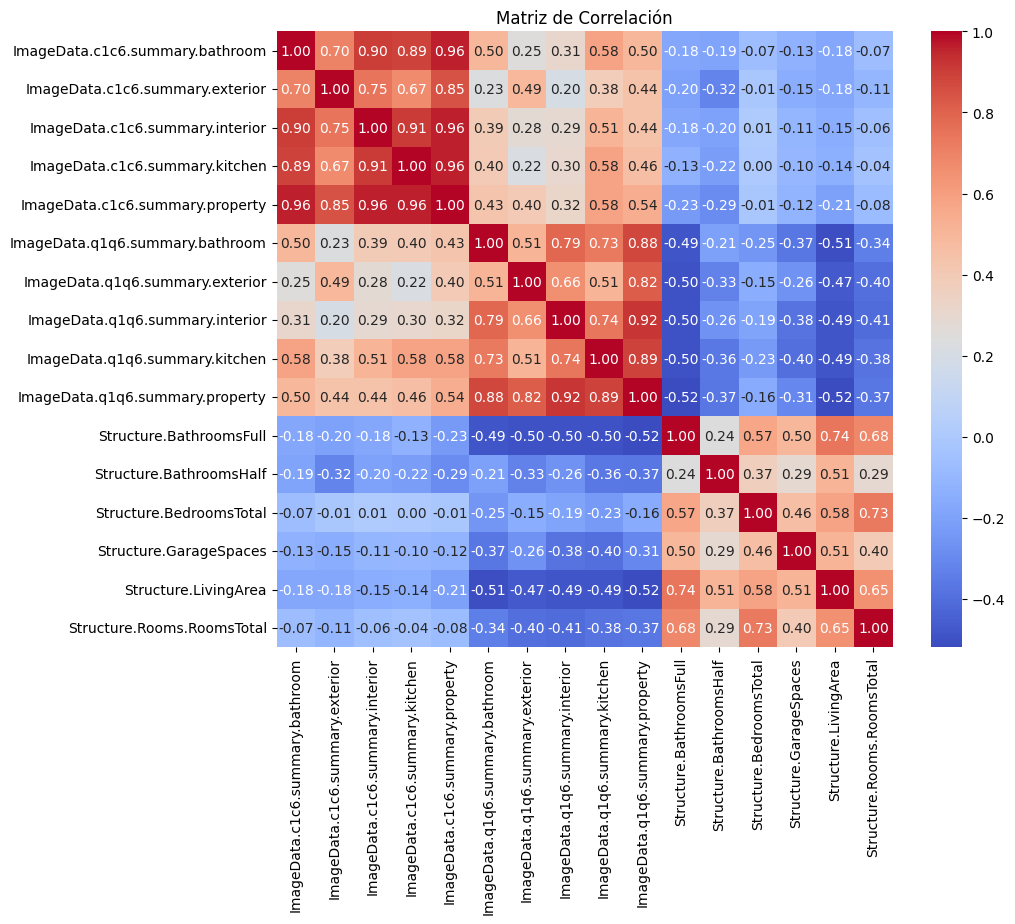

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Medir las correlaciones
corr = np.round(df_numeric_columns.corr(), 2)

# Eliminar la columna/filas que no deseas mostrar (por ejemplo, la variable 'Target')
corr = corr.drop('Listing.Price.ClosePrice', axis=0).drop('Listing.Price.ClosePrice', axis=1)

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 8))  # Puedes ajustar el tamaño de la figura
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Personalización de la gráfica
plt.title('Matriz de Correlación')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15832\1686436283.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette='coolwarm')


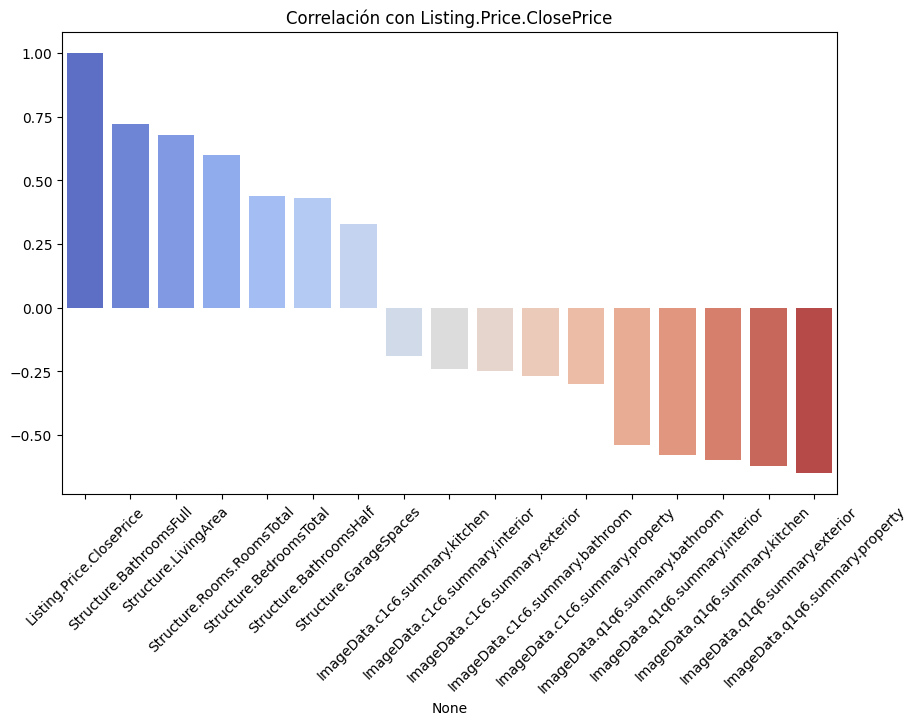

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Medir las correlaciones de todas las variables numéricas
corr = np.round(df_numeric_columns.corr(), 2)

# Obtener las correlaciones con la variable 'Listing.Price.ClosePrice'
corr_target = corr['Listing.Price.ClosePrice'].sort_values(ascending=False)

# Crear un gráfico de barras para mostrar la correlación con la variable 'Listing.Price.ClosePrice'
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette='coolwarm')
plt.title('Correlación con Listing.Price.ClosePrice')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# Dividir los datos en X (características) y y (variable objetivo)
X = df_train_cleaned.drop('Listing.Price.ClosePrice', axis=1)  # Reemplaza 'target_column' con el nombre de tu columna objetivo
y = df_train_cleaned['Listing.Price.ClosePrice']

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar las columnas categóricas
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']

# Crear el modelo CatBoost
model = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    cat_features=categorical_columns,
    eval_metric="RMSE",  # Métrica de validación (puedes cambiarla según tu problema)
    random_seed=42,
    verbose=50  # Muestra cada 50 iteraciones
)

# Ajustar el modelo con el conjunto de validación
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50  # Detener el entrenamiento si no hay mejora en 50 iteraciones
)

TypeError: must be real number, not list